<a href="https://colab.research.google.com/github/MateusFauri/TensorFlow-/blob/main/Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Types of classification problems:
  * Binary classification
  * Multiclass classificiation
  * Mutilabel classification

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y[:]})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


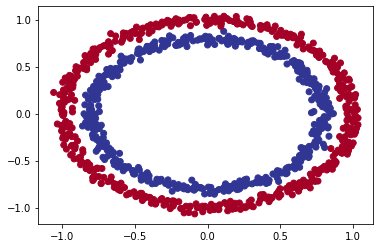

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Creating a model

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y,
                                    test_size=0.2,
                                    random_state=42
)

In [ ]:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 1.0000


[0.012020737864077091, 1.0]

## Plot model's curves


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epochs')

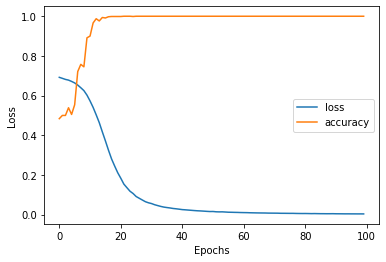

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Finding the best learning rate

* Using Learning rate callback
* Making a plot for loss X learning rate 

In [ ]:
tf.random.set_seed(42)

new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

new_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

#creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_new = new_model.fit(X_train, 
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler],
                        verbose=0)

In [ ]:
new_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9631 - accuracy: 0.5000


[0.9631142616271973, 0.5]

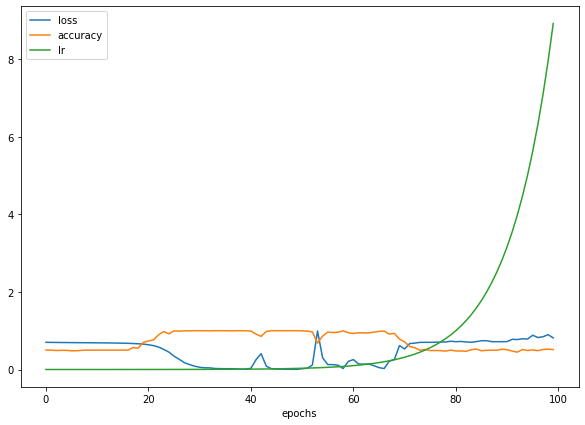

In [ ]:
pd.DataFrame(history_new.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

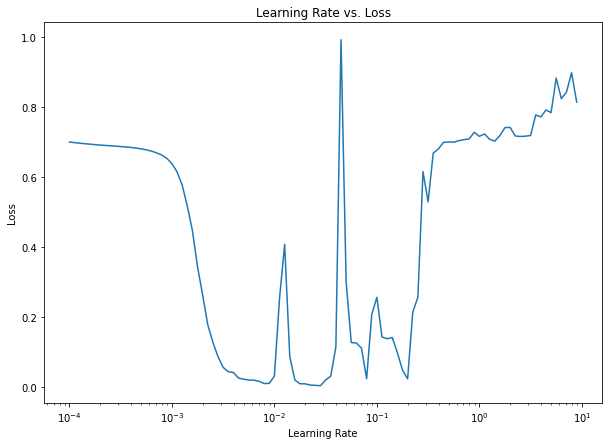

In [ ]:
lrs =  1e-4 * 10**(tf.range(100)/20)

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_new.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

# Classification evaluation Methods

* Accuray:
  * Default metric for classification problems. Not the best for imbalanced classes.

* Precision:
  * Higher precision leads to less false positives.

* Recall:
  * Higher recall leads to less false negatives.

* F1-score:
  * Combination of precision and recall, usually a good overall metric for a classification model.

* Confusion matrix:
  * When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes.



**Precision/recall tradeof:** We can't have both precision and recall high! when increase one, it will reduce the other.


In [ ]:
loss, accuracy = new_model.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.9631 - accuracy: 0.5000


(0.9631142616271973, 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 13ms/step


array([[100,   0],
       [  0, 100]])

# Multiclass classification


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


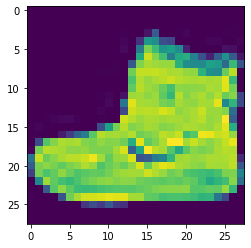

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

train_data[0].shape, len(class_names)

((28, 28), 10)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(10, activation="sigmoid"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_norm,
                    train_labels,
                    validation_data = (test_data_norm, test_labels), 
                    epochs=20,
                    verbose=0)

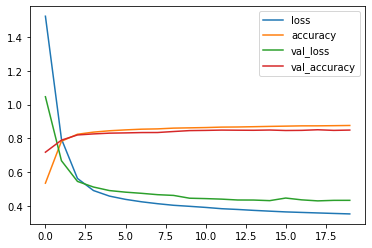

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
history.history["val_accuracy"]

[0.7185999751091003,
 0.789900004863739,
 0.8205999732017517,
 0.8267999887466431,
 0.8313000202178955,
 0.8327999711036682,
 0.8348000049591064,
 0.835099995136261,
 0.8410000205039978,
 0.8464000225067139,
 0.847599983215332,
 0.849399983882904,
 0.8486999869346619,
 0.8482999801635742,
 0.8497999906539917,
 0.847000002861023,
 0.8478000164031982,
 0.8514000177383423,
 0.8476999998092651,
 0.8495000004768372]

## Finding the ideal learning rate 


In [ ]:
tf.random.set_seed(42)

new_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

new_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

new_history = new_model.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=[test_data_norm, test_labels],
                            callbacks=[lr_scheduler],
                            verbose=0)

Text(0.5, 1.0, 'Finding the ideal learning rate')

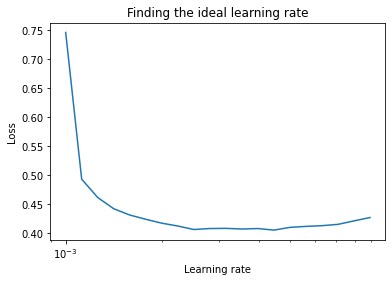

In [ ]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(20)/20))
plt.semilogx(lrs, new_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
from sklearn.metrics import confusion_matrix

y_probs = new_model.predict(test_data_norm)

313/313 [==============================] - 3s 7ms/step


In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
# Convert the prediction prob into integers

y_preds = y_probs.argmax(axis=1)

confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[799,   1,  17,  21,   7,   0, 146,   0,   9,   0],
       [  5, 950,   8,  28,   7,   0,   2,   0,   0,   0],
       [ 11,   2, 677,   8, 176,   1, 124,   1,   0,   0],
       [ 61,  13,  27, 781,  74,   1,  35,   0,   8,   0],
       [  0,   0,  73,  13, 829,   0,  85,   0,   0,   0],
       [  0,   0,   2,   0,   0, 867,   1,  60,  11,  59],
       [146,   1,  93,  19, 100,   1, 635,   0,   5,   0],
       [  0,   0,   0,   0,   0,  12,   0, 949,   5,  34],
       [  1,   0,  11,   5,  22,   1,  35,   6, 919,   0],
       [  0,   0,   0,   0,   0,   5,   1,  39,   3, 952]])

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
    Picks a random image, plots it and labels it with a prediction and truth label
  """

  i = random.randint(0, len(images) )
  target_image = images[i]

  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)


1/1 [==============================] - 0s 32ms/step


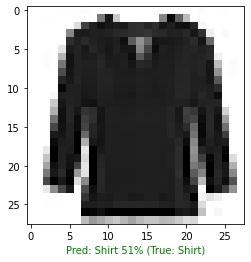

In [ ]:
plot_random_image(model= new_model,
                  images= test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [ ]:
new_model.layers

In [ ]:
weigths, biases = new_model.layers[1].get_weights()

weigths, weigths.shape, biases

(array([[ 1.45726550e+00,  1.78955662e+00, -5.86906970e-01, ...,
         -1.70627236e-03, -9.06291753e-02, -1.07912771e-01],
        [ 7.99561322e-01, -2.69335938e+00,  2.52521825e+00, ...,
         -5.11817150e-02,  2.66221631e-02,  5.09088039e-01],
        [ 4.94429246e-02, -2.15824389e+00,  2.18742514e+00, ...,
          3.95030901e-02,  1.25581360e+00, -3.04322147e+00],
        ...,
        [-4.00165081e-01, -1.59429824e+00, -1.20758832e+00, ...,
          8.54680613e-02,  1.58012176e+00, -1.09914494e+00],
        [-1.65502048e+00, -7.16236979e-02,  1.19905695e-01, ...,
         -3.06173749e-02,  1.53317142e+00,  5.47402024e-01],
        [-9.71226811e-01, -1.49253631e+00, -1.78604150e+00, ...,
          1.87146068e-02,  1.07888333e-01, -2.25546673e-01]], dtype=float32),
 (784, 10),
 array([ 2.3100517 , -0.33990246,  1.532775  , -0.0253778 ,  3.0317168 ,
         0.24243033, -0.38838896, -0.0216567 ,  2.2468727 , -1.6977121 ],
       dtype=float32))